## Heap Sort

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

import time

plt.style.use("ggplot")

%matplotlib inline

## Max-Heapify

In [2]:
def max_heapify(array, i):
    l = (i+1) * 2 - 1
    r = (i+1) * 2
    length = len(array)

    if l < length and array[l] > array[i]:
        largest = l
    else: 
        largest = i
    
    if r < length and array[r] > array[largest]:
        largest = r
        
    if largest != i:
        largest_value = array[largest]
        array[largest] = array[i]
        array[i] = largest_value
        max_heapify(array, largest)
        
    return array

## Build Max Heap

In [3]:
def build_max_heap(array):
    length = len(array)
    for i in range(length//2, -1, -1):
        max_heapify(array, i)

    return array

## Heap Sort

In [4]:
def heap_sort(array):
    length = len(array)
    array = build_max_heap(array)
    for i in range(length-1, 0, -1):
        largest = array[0]
        array[0] = array[i]
        array[i] = largest
        max_heapify(array[:i], 0)
        
    return array

## Quick Sort

In [5]:
def quick_sort(array):
    length = len(array)
    
    if length <= 1:
        return array
    
    if length == 2:
        if array[0] > array[1]:
            return [array[1], array[0]]
        else:
            return array
        
    else:
        pivot = np.random.randint(0, length)
        small = []
        large = []
        
        for element in array:
            if element < array[pivot]:
                small.append(element)
            elif element > array[pivot]:
                large.append(element)
                
        if not small:
            return [array[pivot]] + quick_sort(large)
        elif not large:
            return quick_sort(small) + [array[pivot]]
        else:
            return quick_sort(small) + [array[pivot]] + quick_sort(large)

## Quick Sort in-Place

In [6]:
def quick_sort_in_place(array, start, end):
    if start < end:
        
        if start + 1 == end:
            if array[start] > array[end]:
                larger = array[start]
                array[start] = array[end]
                array[end] = larger
        
        pivot = np.random.randint(start, end+1)
        pivot_value = array[pivot]
        
        array[pivot] = array[-1]
        array[-1] = pivot_value
        
        border = start - 1
        
        for i in range(start, end):
            if array[i] < pivot_value:
                border += 1
                border_value = array[i]
                array[i] = array[border]
                array[border] = border_value
        array[-1] = array[border+1]
        array[border+1] = pivot_value
        
        array = quick_sort_in_place(array, start, border+1)
        array = quick_sort_in_place(array, border+2, end)

    return array

## Merge Sort

In [7]:
def merge_sort(array):
    
    length = len(array)
    
    if length == 1:
        return array
    
    elif length == 2:
        if array[0] > array[1]:
            return np.array([array[1], array[0]])
        else:
            return array
    
    elif length > 2:
        array_l = array[:length//2]
        array_r = array[length//2:]
        array_l_sorted = merge_sort(array_l)
        array_r_sorted = merge_sort(array_r)

        l = 0
        r = 0
        
        l_length = len(array_l)
        r_length = len(array_r)
        
        sorted_list = []
        
        for i in range(length):
            if r == r_length:
                sorted_list.append(array_l_sorted[l])
                l += 1

            elif l == l_length:
                sorted_list.append(array_r_sorted[r])
                r += 1               
                
            elif array_l_sorted[l] > array_r_sorted[r]:
                sorted_list.append(array_r_sorted[r])
                r += 1
                
            elif array_l_sorted[l] < array_r_sorted[r]:
                sorted_list.append(array_l_sorted[l])
                l += 1
        
        return np.array(sorted_list)

## Insertion Sort

In [8]:
def insertion_sort(array):
    for j in range(1, len(array)):
        key = array[j]
        i = j - 1
        while i >= 0 and array[i] > key:
            array[i+1] = array[i]
            i -= 1
        array[i+1] = key
    return array

## Performance Check

In [11]:
time_list = []
for i in range(2, 15):
    Z = np.random.rand(2**i)
    
    start_time = time.time()
    insertion_sort(Z)
    insertion = time.time() - start_time
    
    start_time = time.time()
    merge_sort(Z)
    merge = time.time() - start_time
    
    start_time = time.time()
    quick_sort(Z)
    quick = time.time() - start_time    
    
    start_time = time.time()
    quick_sort_in_place(Z, 0, len(Z)-1)
    quick_ip = time.time() - start_time  
    
    start_time = time.time()
    heap_sort(Z)
    heap = time.time() - start_time       
    
    time_list.append([insertion, merge, quick, quick_ip, heap])
    print("i={}: completed".format(i))

i=2: completed
i=3: completed
i=4: completed
i=5: completed
i=6: completed
i=7: completed
i=8: completed
i=9: completed
i=10: completed
i=11: completed
i=12: completed
i=13: completed
i=14: completed


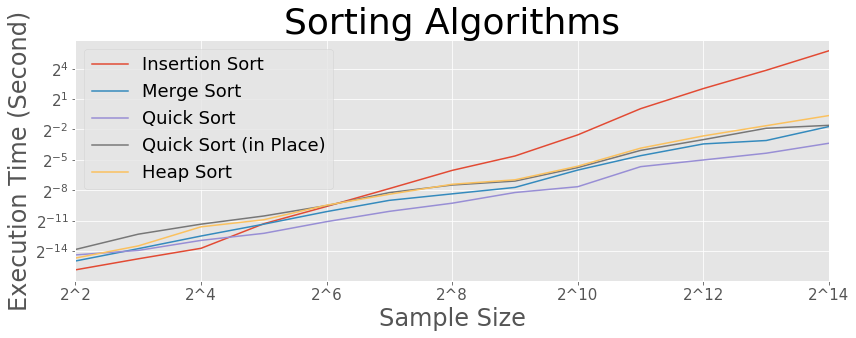

In [12]:
time_df = pd.DataFrame(time_list, index=range(2, 15), columns=["insertion", "merge", "quick", "quick_in_place", "heap"])
time_df.plot(figsize=(12, 4.8))

plt.title("Sorting Algorithms", fontsize=36)
plt.legend(["Insertion Sort", "Merge Sort", "Quick Sort", "Quick Sort (in Place)", "Heap Sort"], fontsize=18)
plt.xlabel("Sample Size", fontsize = 24)
plt.xticks(np.arange(2, 15, 2), labels = ["2^{}".format(i) for i in range(2, 15, 2)], fontsize=15)
plt.yticks(fontsize=15)
plt.yscale("log", basey=2)
plt.ylabel("Execution Time (Second)", fontsize = 24)
plt.tight_layout()
plt.savefig("image/insertion_quick_merge_heap_sort.png")
plt.show()